In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


df = pd.read_csv('houses_to_rent_v2.csv')
df.head(20)


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


# Data representation

In [2]:


df_notfurnished = df[df.furniture == 'not furnished']
df_furnished = df[df.furniture == 'furnished']
mean_by_city_not_furnished = df_notfurnished.groupby('city', as_index=False)['total (R$)'].mean()
mean_by_city_not_furnished

,city,total (R$)
0,Belo Horizonte,6362.868640
1,Campinas,3078.187332
2,Porto Alegre,2687.272311
3,Rio de Janeiro,4093.387215
4,São Paulo,5948.773405


In [3]:
mean_by_city_furnished = df_furnished.groupby('city', as_index=False)['total (R$)'].mean()
mean_by_city_furnished

,city,total (R$)
0,Belo Horizonte,6024.372881
1,Campinas,3808.918919
2,Porto Alegre,3818.605016
3,Rio de Janeiro,6009.556650
4,São Paulo,7545.463905


In [4]:
df_bh = df[df.city == 'Belo Horizonte']
df_bh_not = df_bh[df_bh.furniture == 'not furnished']
df_bh_not.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) #retirando notação cientifica

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,1081,1081,1081,1081,1081,1081,1081,1081,1081
mean,167.065,3.037,2.35893,1.91212,2574.83,3485.19,251.045,51.3228,6362.87
std,156.021,1.23922,1.38268,1.6218,48007.3,3373.74,324.845,52.1939,48133.3
min,15,1,1,0,0,450,0,6,499
25%,69,2,1,1,0,1200,68,17,1568
50%,110,3,2,2,270,2150,140,31,2845
75%,212,4,3,3,666,4275,310,62,5557
max,2000,10,10,8,1.117e+06,15000,2752,246,1.12e+06


In [5]:
df_bh_true = df_bh[df_bh.furniture == 'furnished']
df_bh_true.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))) #retirando notação cientifica

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,177,177,177,177,177,177,177,177,177
mean,453.825,2.9209,2.66667,2.22034,793.514,4756.99,405.537,68.0452,6024.37
std,3475.85,1.4903,1.68775,1.90753,843.338,3991.35,1008.61,59.8339,4973.41
min,15,1,1,0,0,700,0,10,710
25%,55,2,1,1,175,1500,75,20,2191
50%,128,3,2,2,550,3300,182,44,4261
75%,250,4,4,3,1100,7100,466,102,8917
max,46335,7,8,8,3500,15000,12500,246,27760


Em Belo Horizonte, é possível observar que em média, irá se pagar mais caro por um imóvel não mobiliado, do que por um imóvel mobiliado, no entanto, isso se deve ao fato de que a média dos imóveis não mobiliados possuem um maior tamanho, o que resulta em um maior preço.

Agora vamos refazer o experimento, só que limitando a área 


In [6]:
df_lim = df[df.area < 150]
df_lim_notfurnished = df_lim[df_lim.furniture == 'not furnished']
df_lim_furnished = df_lim[df_lim.furniture == 'furnished']
df_lim_mean_furnished = df_lim_furnished.groupby('city', as_index=False)['total (R$)'].median()
df_lim_mean_furnished

,city,total (R$)
0,Belo Horizonte,2237.0
1,Campinas,2891.0
2,Porto Alegre,2628.5
3,Rio de Janeiro,3835.5
4,São Paulo,4210.0


In [7]:
df_lim_not_furnished = df_lim_notfurnished.groupby('city',as_index=False)['total (R$)'].median()
df_lim_not_furnished

,city,total (R$)
0,Belo Horizonte,1784.5
1,Campinas,1681.5
2,Porto Alegre,1778.5
3,Rio de Janeiro,2533.5
4,São Paulo,2712.5


In [8]:
df_lim.shape

(7261, 13)

(0.0, 5500.0)

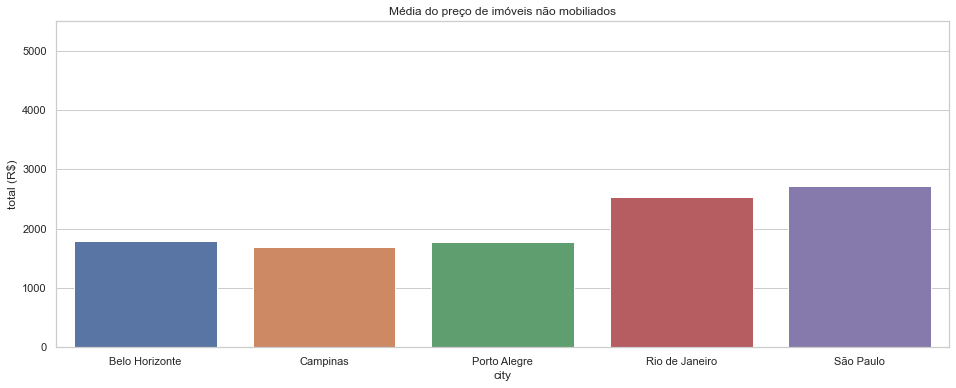

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")
df_lim_not_furnished = df_lim_not_furnished.sort_values('city')
plt.figure(figsize=(16, 6))
sns.barplot(x='city', y='total (R$)',data=df_lim_not_furnished).set_title('Média do preço de imóveis não mobiliados')
plt.ylim(0,5500)



(0.0, 5500.0)

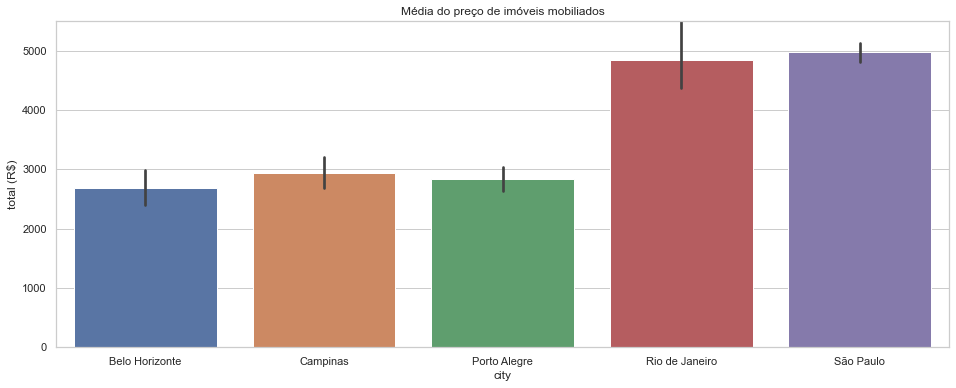

In [10]:

df_lim_furnished = df_lim_furnished.sort_values('city')
plt.figure(figsize=(16, 6))
sns.barplot(x='city', y='total (R$)',data=df_lim_furnished).set_title('Média do preço de imóveis mobiliados')
plt.ylim(0,5500)

In [11]:
df['price_per_sqft'] = df['total (R$)']/df['area']

In [12]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),price_per_sqft
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03,46.652103
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04,128.578621
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02,0.189837
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03,25.275521
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03,36.375000
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03,54.214560
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06,7545.238095


In [13]:
df.shape

(10692, 14)

# Preparando os dados

In [14]:
dummies = pd.get_dummies(df.city)
df1 = pd.concat([df,dummies.drop('Campinas',axis='columns')],axis='columns')
df2 = df1.drop('city',axis='columns')
df3 = df2.drop(['hoa (R$)','rent amount (R$)','property tax (R$)','fire insurance (R$)'],axis='columns')
df3.floor = pd.to_numeric(df3.floor,errors='coerce')
df3.loc[df3.animal == 'acept', 'animal'] = 1
df3.loc[df3.animal == 'not acept','animal'] = 0
df3.loc[df3.furniture == 'furnished','furniture'] = 1
df3.loc[df3.furniture == 'not furnished','furniture'] = 0
df4 = df3.dropna()

df4

,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$),price_per_sqft,Belo Horizonte,Porto Alegre,Rio de Janeiro,São Paulo
0,70,2,1,1,7.0,1,1,5618,80.257143,0,0,0,1
1,320,4,4,0,20.0,1,0,7973,24.915625,0,0,0,1
2,80,1,1,1,6.0,1,0,3841,48.012500,0,1,0,0
3,51,2,1,0,2.0,1,0,1421,27.862745,0,1,0,0
4,25,1,1,0,1.0,0,0,836,33.440000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10686,150,3,3,2,8.0,0,1,13670,91.133333,0,0,0,1
10687,63,2,1,1,5.0,0,1,1926,30.571429,0,1,0,0
10688,285,4,4,4,17.0,1,0,19260,67.578947,0,0,0,1
10689,70,3,3,0,8.0,0,1,7390,105.571429,0,0,1,0


In [15]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('area'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df6 = df5.drop('price_per_sqft',axis='columns')


In [16]:
df6.shape

(6171, 12)

In [17]:
X = df6.drop(['total (R$)'],axis='columns')

In [18]:
y = df6['total (R$)']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [20]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)
y_pred = lr_clf.predict(X_test)

In [21]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81529916, 0.76339973, 0.81123627, 0.80038101, 0.80693669])

In [22]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'random_forest_regressor' : {
            'model': RandomForestRegressor(),
            'params': {
                'random_state' : [1,20],
            }
        },
        'ridge' : {
            'model': Ridge(),
            'params': {
                'alpha': [0,4],
                'normalize': [True, False],
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.799451,{'normalize': True}
1,random_forest_regressor,0.811795,{'random_state': 1}
2,ridge,0.799478,"{'alpha': 4, 'normalize': False}"
3,lasso,0.799518,"{'alpha': 2, 'selection': 'cyclic'}"
4,decision_tree,0.676170,"{'criterion': 'mse', 'splitter': 'best'}"


In [ ]:
def find_best_forest(X,y):
    algos = {
    
        'random_forest_regressor' : {
            'model': RandomForestRegressor(),
            'params': {
                'bootstrap': [False],
                 'max_depth': [ 180 , None],
                 'max_features': [ 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [ 10],
                 'n_estimators': [400,600],
            }
    }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

dfe = find_best_forest(X,y)


In [ ]:
pd.set_option('display.max_colwidth', None)
dfe

In [ ]:
ForestRegressor = RandomForestRegressor(n_estimators=600,max_features='sqrt',min_samples_split=10)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(ForestRegressor, X, y, cv=cv)

In [ ]:
ForestRegressor.fit(X_train,y_train)
ForestRegressor.score(X_test,y_test)

In [ ]:
lr_clf.score(X_train,y_train)
lr_clf.score(X_test,y_test)



In [ ]:
def predict_price(location,area,rooms,bathroom,parking_spaces,floor,animal,furniture):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = rooms
    x[2] = bathroom
    x[3] = parking_spaces 
    x[4] = floor
    x[5] = animal
    x[6] = furniture
    
    if loc_index >= 0:
        x[loc_index] = 1

    return ForestRegressor.predict([x])[0]

In [ ]:
predict_price('São Paulo',650,3,3,1,1,1,1)

In [ ]:
import pickle
with open('brazil_home_prices.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))